<a href="https://colab.research.google.com/github/tharushaliyanagama/OralCancerEarlyDetection-DSGP/blob/Image-Validation/ResNet50_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/drive/MyDrive/Proper_dataset/train"
test_dir = "/content/drive/MyDrive/Proper_dataset/val"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), class_mode='binary')

Found 2603 images belonging to 2 classes.
Found 651 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load ResNet50 without top layers
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid")(x)  # Binary classification

model_resnet = Model(inputs=base_model.input, outputs=output)

# Compile model
model_resnet.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Train model
model_resnet.fit(train_data, validation_data=test_data, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7875 - loss: 0.7037

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


82/82 ━━━━━━━━━━━━━━━━━━━━ 949s 11s/step - accuracy: 0.7880 - loss: 0.7013 - val_accuracy: 0.8479 - val_loss: 0.3775
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 644s 7s/step - accuracy: 0.8487 - loss: 0.3819 - val_accuracy: 0.8479 - val_loss: 0.3307
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 568s 7s/step - accuracy: 0.8557 - loss: 0.3538 - val_accuracy: 0.8679 - val_loss: 0.3369
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 615s 7s/step - accuracy: 0.8543 - loss: 0.3378 - val_accuracy: 0.8587 - val_loss: 0.3015
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 595s 7s/step - accuracy: 0.8584 - loss: 0.3303 - val_accuracy: 0.8541 - val_loss: 0.3081
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 594s 7s/step - accuracy: 0.8440 - loss: 0.3590 - val_accuracy: 0.8479 - val_loss: 0.3144
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 604s 7s/step - accuracy: 0.8364 - loss: 0.3438 - val_accuracy: 0.8479 - val_loss: 0.3012
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 592s 7s/step - accuracy: 0.8452 - loss: 0.3333 - val_accuracy: 0.8479 - val_loss: 0

In [ ]:
test_loss, test_accuracy = model_resnet.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 109s 5s/step - accuracy: 0.8413 - loss: 0.3040
Test Accuracy: 84.79%


In [ ]:
import cv2
import numpy as np

# Prediction function
def predict_image_resnet(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model_resnet.predict(img)[0][0]
    if prediction > 0.5:
        print("🔴 Non-Mouth Image Detected (ResNet50)")
    else:
        print("✅ Mouth Image Detected (ResNet50)")

# Example usage
predict_image_resnet("/content/drive/MyDrive/test_notMouth_img.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
✅ Mouth Image Detected (ResNet50)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels and predictions
y_true = test_data.classes  # True labels
y_pred_prob = model_resnet.predict(test_data)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate classification report
report = classification_report(y_true, y_pred, target_names=test_data.class_indices.keys())
print("Classification Report:\n", report)

 2/21 ━━━━━━━━━━━━━━━━━━━━ 2:02 6s/step

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 114s 5s/step
Classification Report:
               precision    recall  f1-score   support

       mouth       0.85      1.00      0.92       552
   non_mouth       0.00      0.00      0.00        99

    accuracy                           0.85       651
   macro avg       0.42      0.50      0.46       651
weighted avg       0.72      0.85      0.78       651



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


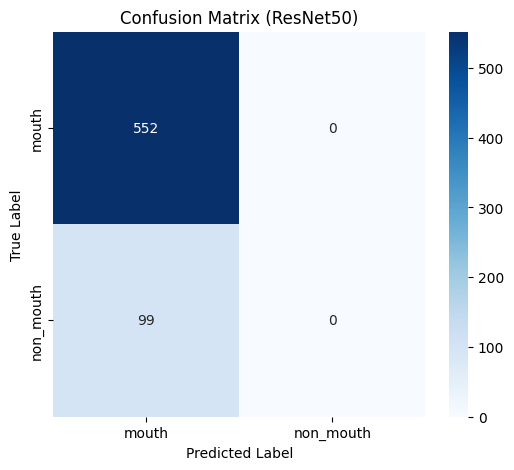

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (ResNet50)")
plt.show()